In [34]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [36]:
# Step 2: Load Data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_Y3wMUE5_7gLdaTN.csv')


In [37]:
# Step 3: Check and Clean Column Names
train.columns = train.columns.str.strip()  # remove any extra spaces
test.columns = test.columns.str.strip()

In [38]:
# Step 4: Explore Data
print(train.columns)                     # check column names
print(train['Loan_Status'].value_counts())  # ensure target column is present

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [54]:
# Step 7: Encode Categorical Columns
le = LabelEncoder()
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = le.fit_transform(test[col])  # Caution: should be fit from train ideally


In [55]:
# Step 8: Prepare Features and Target
X = train.drop('Loan_Status', axis=1)  # features
y = train['Loan_Status']               # target


In [56]:
# Step 9: Split Train and Validation Set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Step 10: Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [58]:
# Step 11: Evaluate the Model
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.6910569105691057
Confusion Matrix:
 [[22 21]
 [17 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.51      0.54        43
           1       0.75      0.79      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.65       123
weighted avg       0.69      0.69      0.69       123



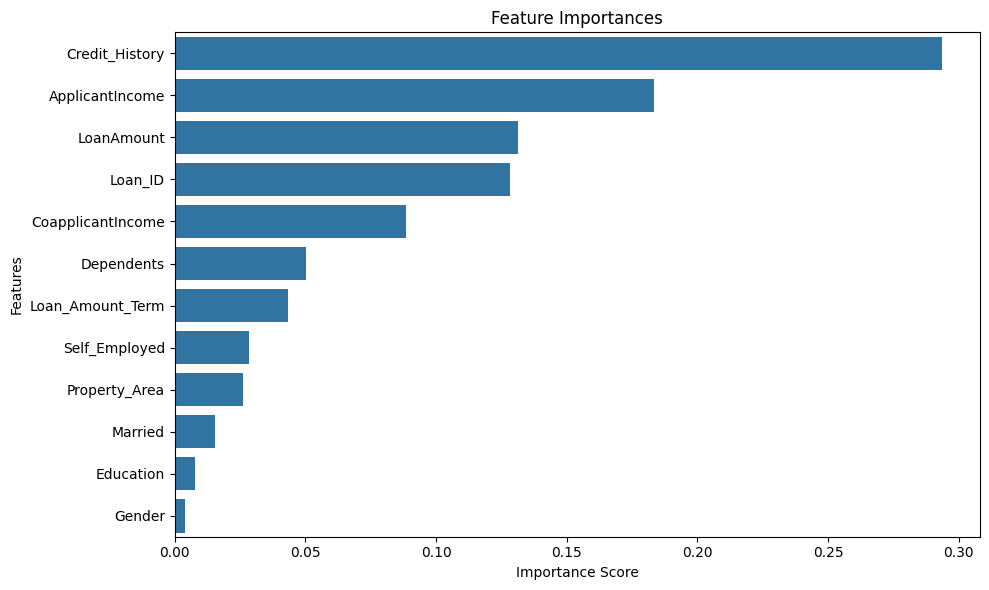

In [59]:
# Step 12: Visualize Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

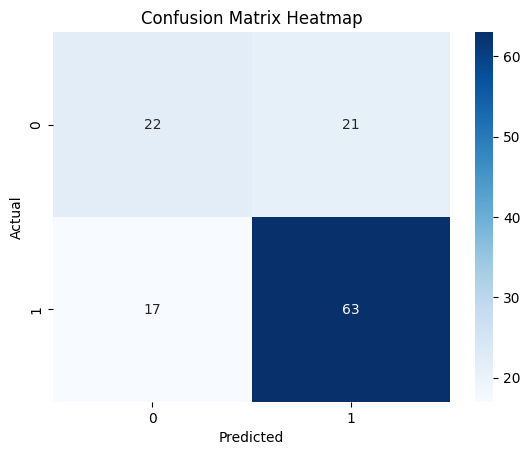

In [60]:
#Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

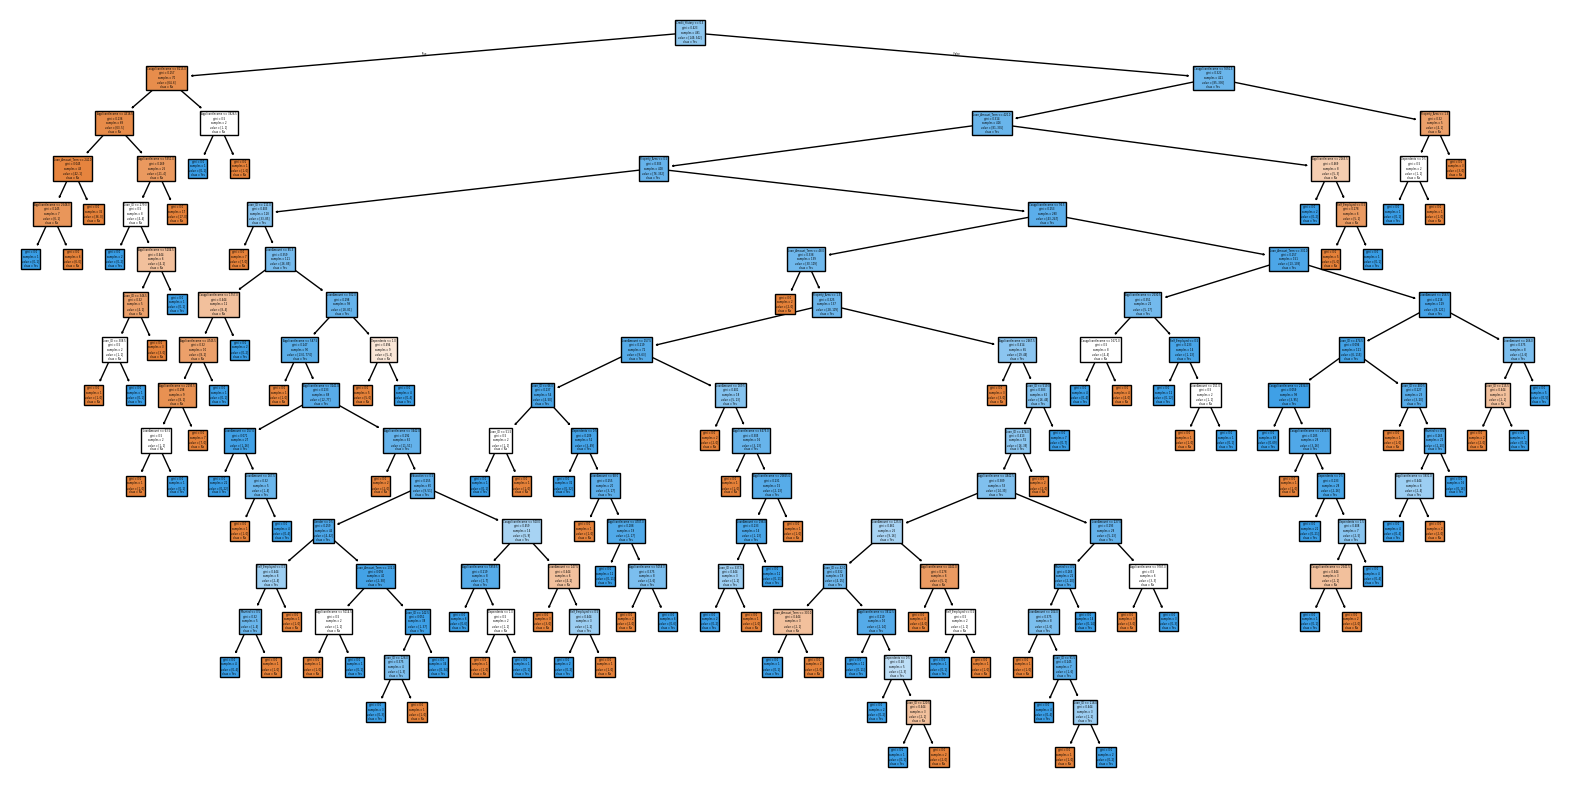

In [61]:
#Decision Tree Plot
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


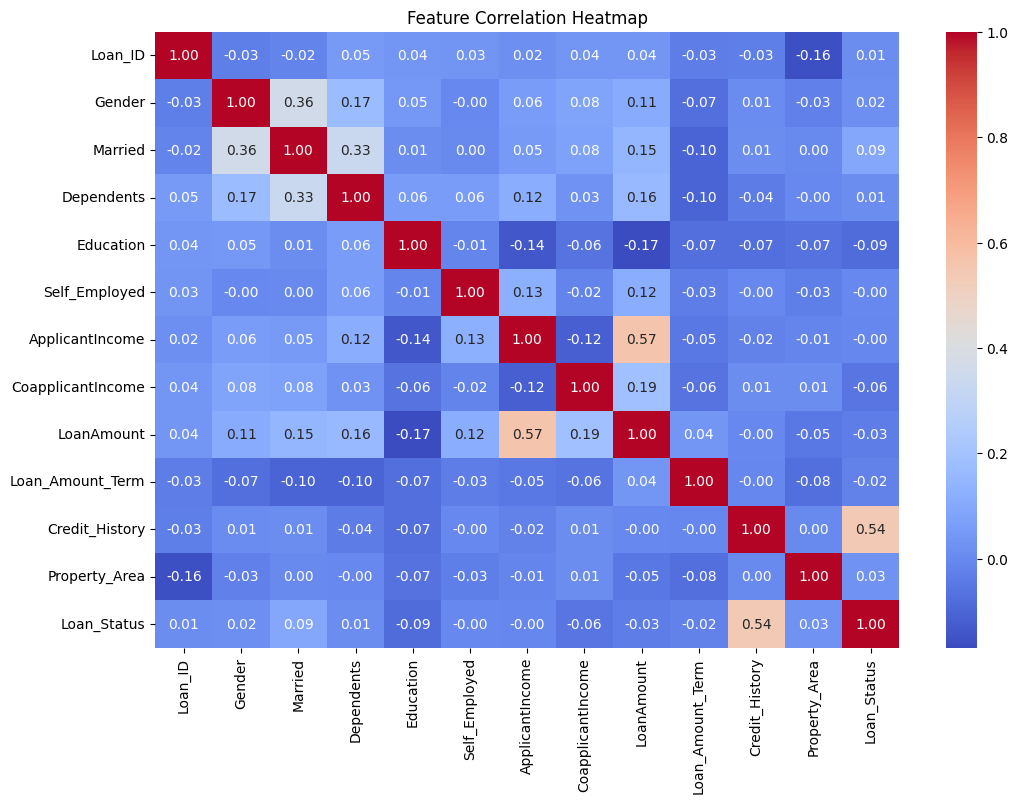

In [62]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()